In [1]:
"""Example showing the optimization and evolution of surrogates"""

# Copyright (c) 2024 Alliance for Sustainable Energy, LLC

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

__authors__ = ["Weslley S. Pereira"]
__contact__ = "weslley.dasilvapereira@nrel.gov"
__maintainer__ = "Weslley S. Pereira"
__email__ = "weslley.dasilvapereira@nrel.gov"
__credits__ = ["Weslley S. Pereira"]
__version__ = "0.4.2"
__deprecated__ = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d(x, y, FX, bounds, label):
    fig, ax = plt.subplots()
    im = ax.imshow(FX, cmap="jet", extent=[bounds[0][0],bounds[0][1],bounds[1][1],bounds[1][0]])
    fig.colorbar(im, ax=ax, label=label)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.scatter(x[0:len(x)-1],y[0:len(x)-1],c='gray',marker='x')
    ax.scatter(x[-1],y[-1],c='w',marker='x')
    return fig, ax

In [3]:
def ackley(x, n: int = 2):
    from math import exp, sqrt, pi

    a = 20
    b = 0.2
    c = 2*pi
    return (
        -a * exp(-b * sqrt(np.dot(x, x) / n))
        - exp(np.sum(np.cos(c * np.asarray(x))) / n)
        + a
        + exp(1)
    )


def eggholder(x):
    return -(x[1]+47)*np.sin(np.sqrt(abs(x[1]+0.5*x[0]+47)))-x[0]*np.sin(np.sqrt(abs(x[0]-(x[1]+47))))

def quadratic(x):
    return (x[0] - 500)**2 + (x[1] - 2875)**2

objf = {}
# Breaks the symmetry of the problem
objf["ackley"] = lambda x: ackley([xi - 3.14 for xi in x], n=2)
objf["eggholder"] = eggholder
objf["quadratic"] = quadratic

refbounds = {}
refbounds["ackley"] = [-32.768, 32.768]
refbounds["eggholder"] = [-512, 512]
refbounds["quadratic"] = [0, 10000]

In [4]:
# Define dimensions and bounds
n = 2
funcstr = "eggholder"
bounds = [refbounds[funcstr]] * n

In [5]:
# Compute the mean and standard deviation of the GP
nx = 100
ny = 100
x = np.linspace(bounds[0][0], bounds[0][1], nx)
y = np.linspace(bounds[1][0], bounds[1][1], ny)
XY = np.array([[[x[j], y[i]] for j in range(nx)] for i in range(ny)])

/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best value of  -441.50075089951764  at  [-256.  256.]
Last sample point at  [ 256. -256.]
Best value of  -441.50075089951764  at  [-256.  256.]
Last sample point at  [ 160.05735812 -190.649226  ]
Best value of  -441.50075089951764  at  [-256.  256.]
Last sample point at  [-267.26296363  312.02946057]
Best value of  -441.50075089951764  at  [-256.  256.]
Last sample point at  [-243.64640333  194.5455753 ]
Best value of  -529.6685909874853  at  [-259.73250339  274.56828649]
Last sample point at  [-259.73250339  274.56828649]
Best value of  -529.6685909874853  at  [-259.73250339  274.56828649]
Last sample point at  [ 38.35643547 377.54870138]
Best value of  -533.0465219338738  at  [-234.1429752   281.57063092]
Last sample point at  [-234.1429752   281.57063092]
Best value of  -533.0465219338738  at  [-234.1429752   281.57063092]
Last sample point at  [351.30167223 319.30135281]
Best value of  -533.0465219338738  at  [-234.1429752   281.57063092]
Last sample point at  [ 85.66725141 332.074

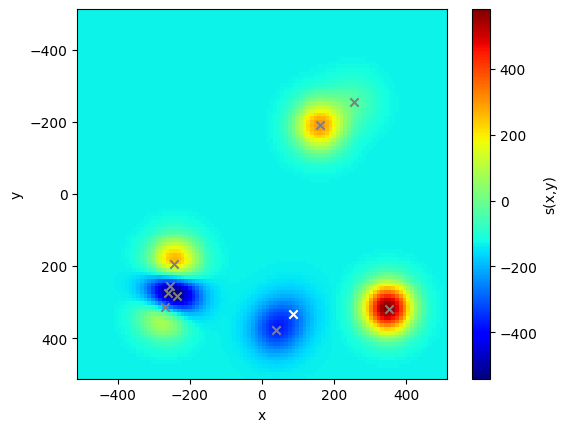

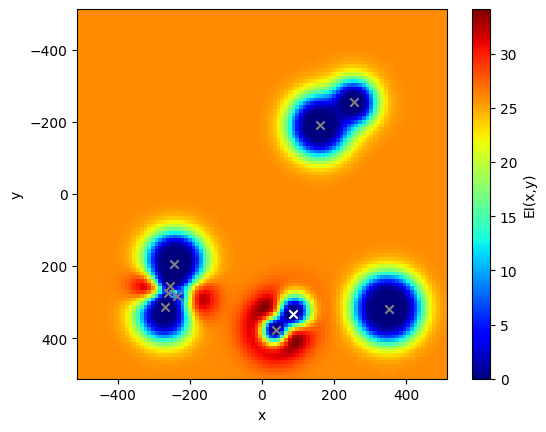

Best value of  -533.0465219338738  at  [-234.1429752   281.57063092]
Last sample point at  [  8.30568509 317.46311746]
Best value of  -533.0465219338738  at  [-234.1429752   281.57063092]
Last sample point at  [-344.32428055  280.24474643]
Best value of  -533.0465219338738  at  [-234.1429752   281.57063092]
Last sample point at  [ 97.83335502 401.41549121]
Best value of  -725.50265856333  at  [-278.96008502  510.4911151 ]
Last sample point at  [-278.96008502  510.4911151 ]


/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best value of  -725.50265856333  at  [-278.96008502  510.4911151 ]
Last sample point at  [-251.57731721  512.        ]
Best value of  -725.50265856333  at  [-278.96008502  510.4911151 ]
Last sample point at  [-286.73225844  479.77615722]
Best value of  -725.50265856333  at  [-278.96008502  510.4911151 ]
Last sample point at  [-11.18632463 420.27646097]
Best value of  -725.50265856333  at  [-278.96008502  510.4911151 ]
Last sample point at  [104.63257301  68.16083019]
Best value of  -725.50265856333  at  [-278.96008502  510.4911151 ]
Last sample point at  [-161.51202957  300.22905102]


/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best value of  -725.50265856333  at  [-278.96008502  510.4911151 ]
Last sample point at  [114.18052175 261.90941748]


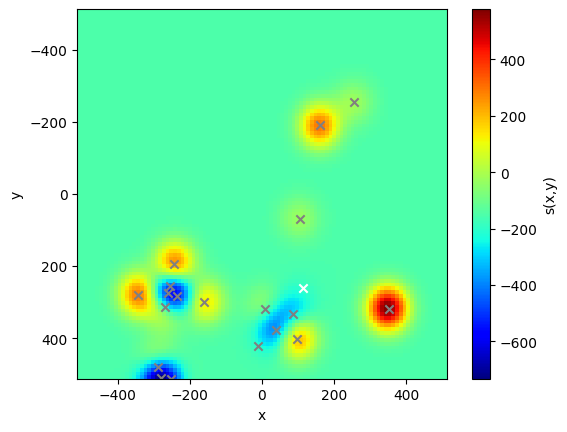

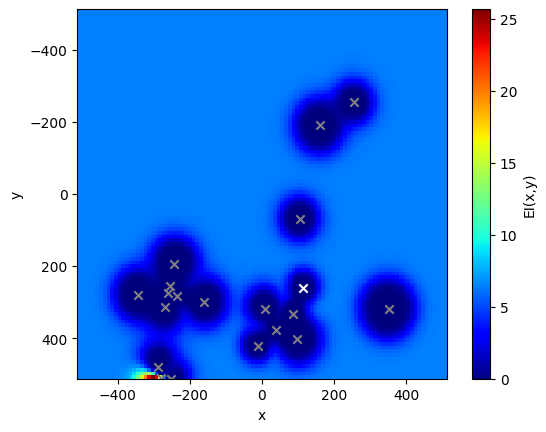

Best value of  -725.50265856333  at  [-278.96008502  510.4911151 ]
Last sample point at  [ 83.81842441 327.28520383]
Best value of  -725.50265856333  at  [-278.96008502  510.4911151 ]
Last sample point at  [ -93.17894342 -459.79356987]
Best value of  -725.50265856333  at  [-278.96008502  510.4911151 ]
Last sample point at  [ -0.8284934  108.20015416]
Best value of  -725.50265856333  at  [-278.96008502  510.4911151 ]
Last sample point at  [-414.62717275 -287.1566223 ]
Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [-301.81545337  512.        ]
Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [210.6670289   -9.93879611]
Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [509.38303467 -12.07492606]
Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [-132.97625367  -66.11495664]


/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [-345.82570577  512.        ]
Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [-429.17966133  512.        ]


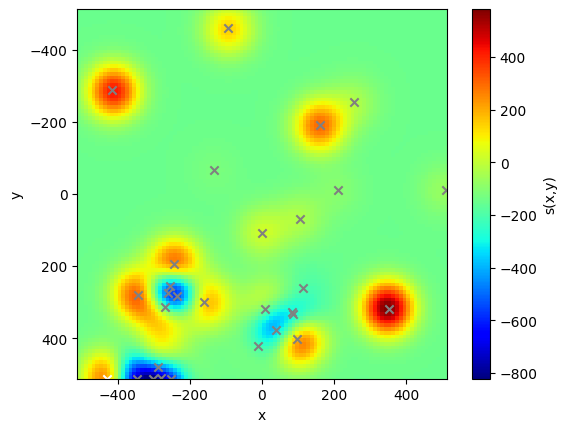

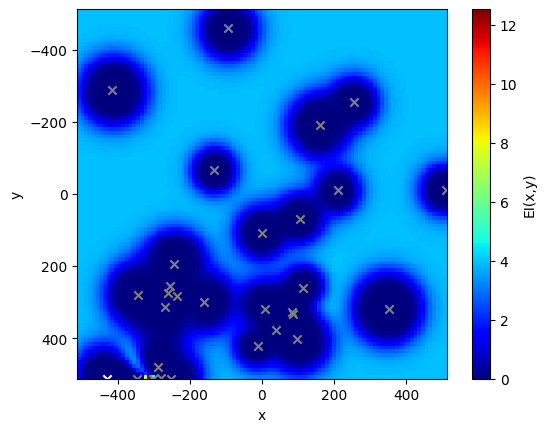

Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [ 505.54400935 -484.32133148]
Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [-511.64284143   10.96076478]
Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [-455.48139258  -21.27450313]
Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [-512.           68.08012717]
Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [-337.45346497 -505.92105647]
Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [-414.69942052 -508.31666528]
Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [-277.60166206 -504.39546637]
Best value of  -809.71330331808  at  [-301.81545337  512.        ]
Last sample point at  [-329.34783836 -436.39109538]
Best value of  -809.71330331808  at  [-301.81545

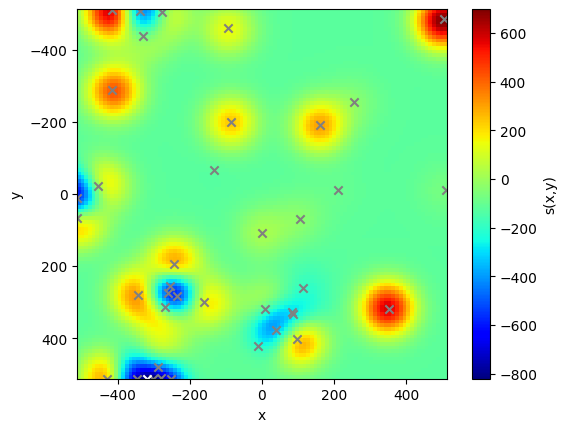

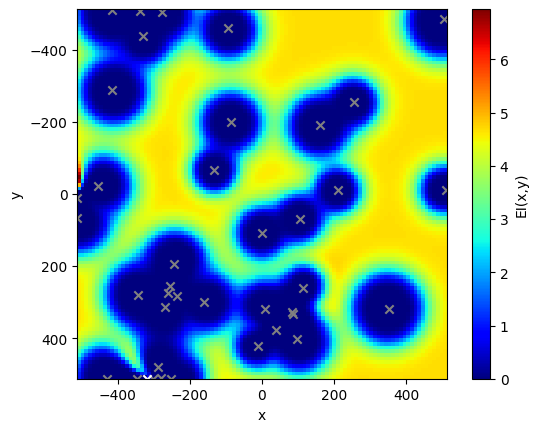

Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [ 194.54169353 -508.57435829]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [ 496.54494967 -228.44659544]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [ 413.4604658  -162.69228869]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [ 512.         -316.54901979]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-512.          -43.28771233]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [ 423.57297336 -315.49858332]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [499.51324014 505.39592897]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-11.0646442  331.87941498]


/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [422.05582584 512.        ]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [350.4142431  97.9856108]


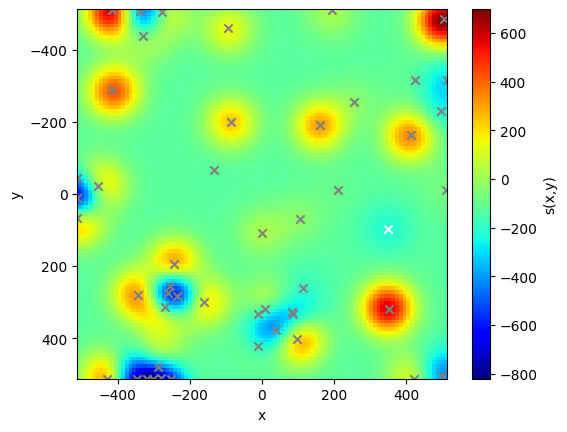

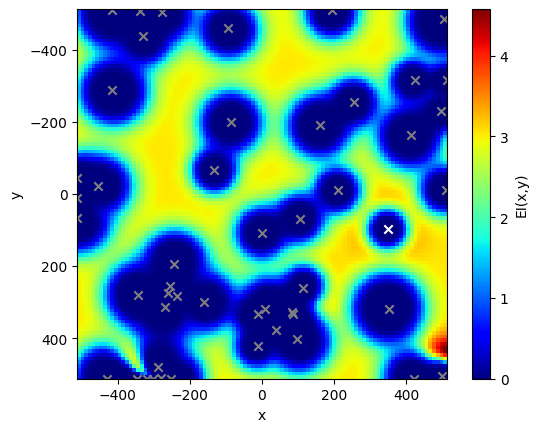

Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [512.         433.96904316]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [258.70955579 144.49840147]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [443.36146347 138.33309569]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [347.24652413   1.8338054 ]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-268.13448186 -100.25149198]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [  72.95011638 -366.67125098]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [   6.6942618  -326.95864411]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [  55.39995025 -443.88887995]
Best value of  -820.1293359923075  at  [

/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [  94.46076404 -303.47961291]


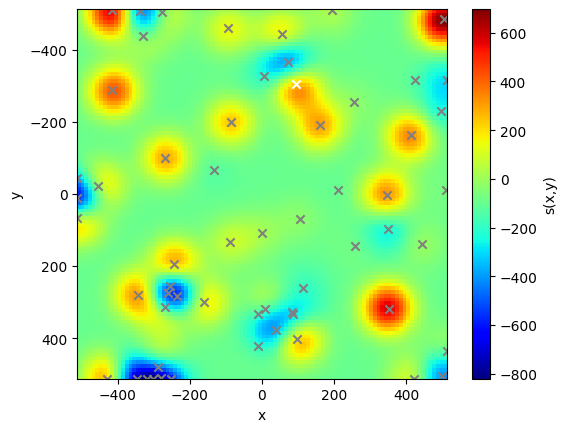

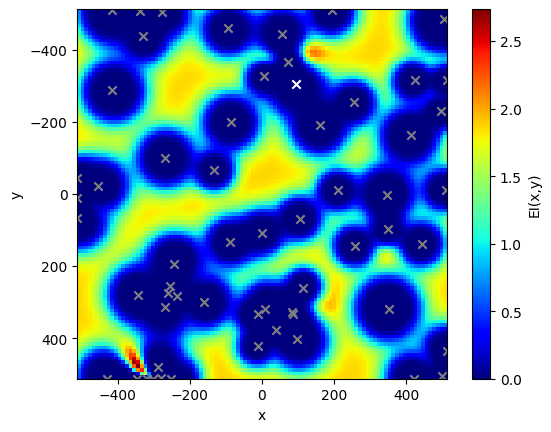

/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-288.474815     -5.52445026]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-198.82689663   35.83131882]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [ 233.81254604 -138.9952648 ]


/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-347.88915436  479.35920341]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [ 144.80462265 -394.99694011]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [ 475.54164929 -481.21423979]


/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-10.15671212 -47.03795365]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-337.27637847   76.98511639]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-220.81979998 -309.1594625 ]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-110.15835484  512.        ]


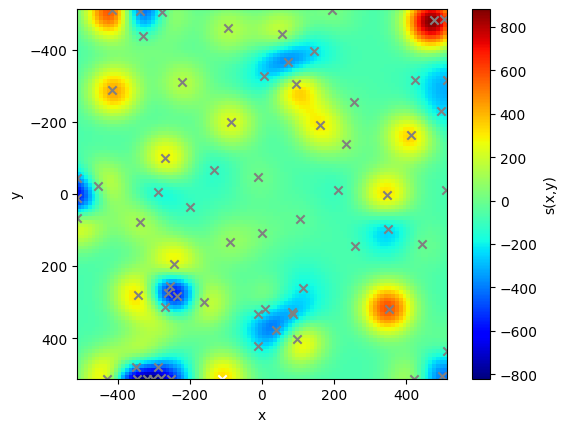

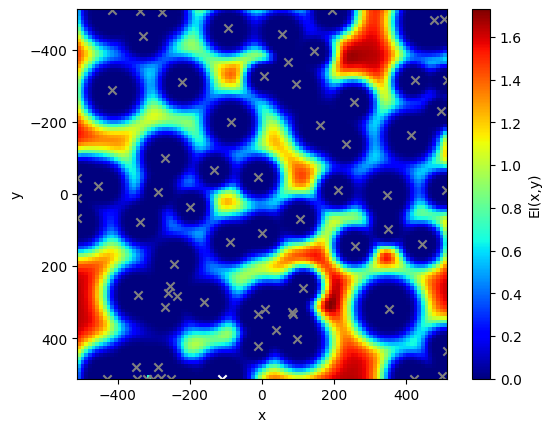

Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [192.44568428 307.99498814]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [ 253.31839796 -385.35043816]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [203.15651475 228.51578064]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-512.          334.93492167]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [147.96644458 167.20022704]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [246.09399272 512.        ]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-512.          230.65700987]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [244.61675266 425.08040616]
Best value of  -820.1293359923075  at  [-3

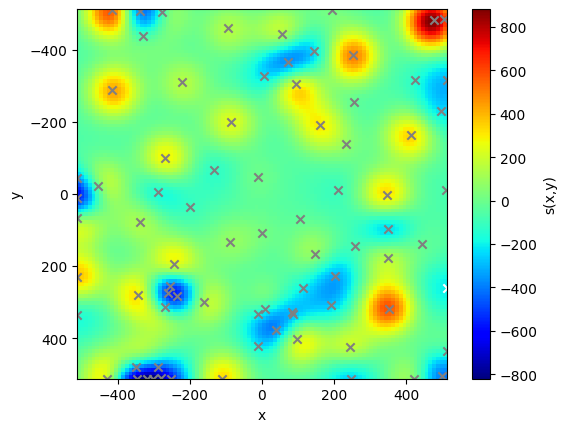

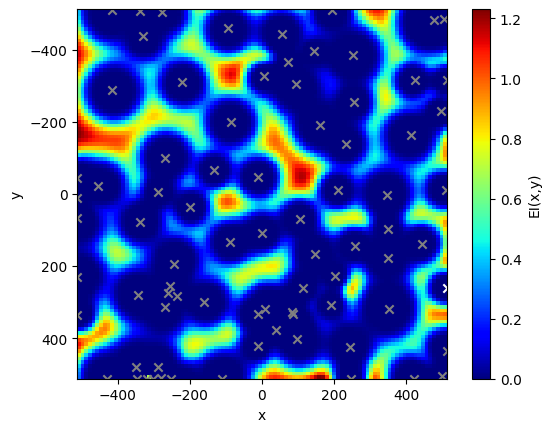

/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [130.08054758 166.523956  ]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [ -85.84910227 -336.28202054]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-512.         -169.13652686]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [111.24501429 -46.82416849]


/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-60.97633469 224.72389606]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-96.18119051  19.44243489]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [164.53843545 512.        ]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [  31.19479202 -153.31532438]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [512.        337.4867726]


/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-277.5976586  -220.91198184]


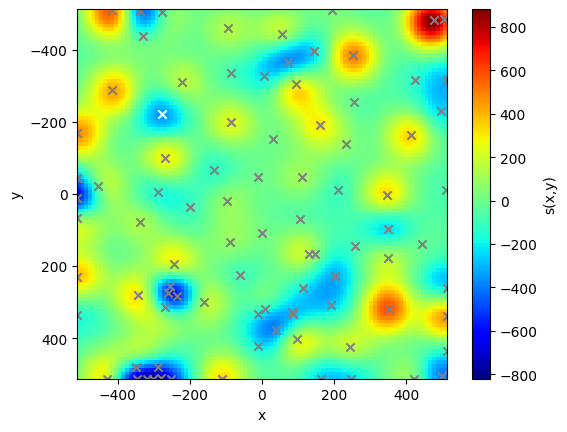

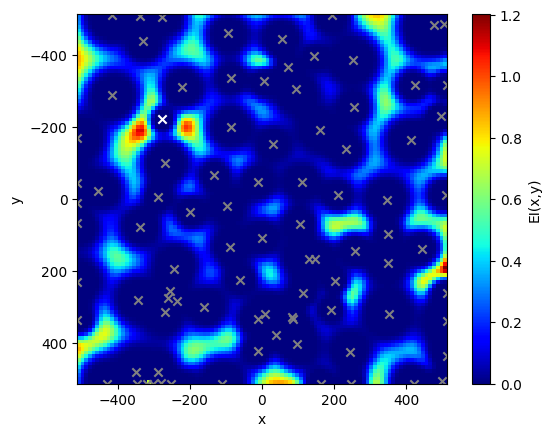

Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-340.65324316 -190.3654033 ]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [ 47.86455965 512.        ]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-214.83151279 -203.5588537 ]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [512.         193.67784091]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [-300.88305478 -275.38325326]
Best value of  -820.1293359923075  at  [-317.61875468  512.        ]
Last sample point at  [440.5615339   58.77801893]
Best value of  -833.3686515989903  at  [-443.42403376  377.54071521]
Last sample point at  [-443.42403376  377.54071521]
Best value of  -833.3686515989903  at  [-443.42403376  377.54071521]
Last sample point at  [-433.89641506  360.26165583]
Best value of  -890.5137471965352  at 

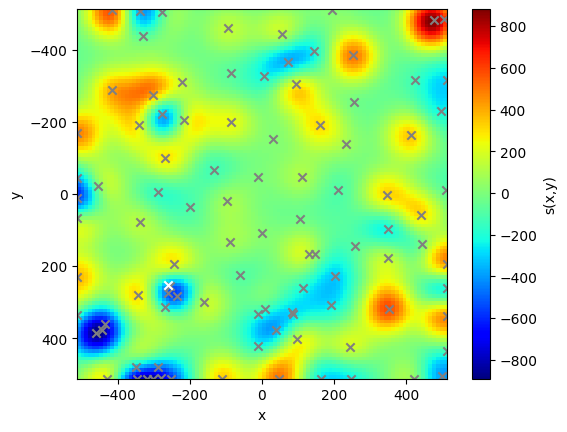

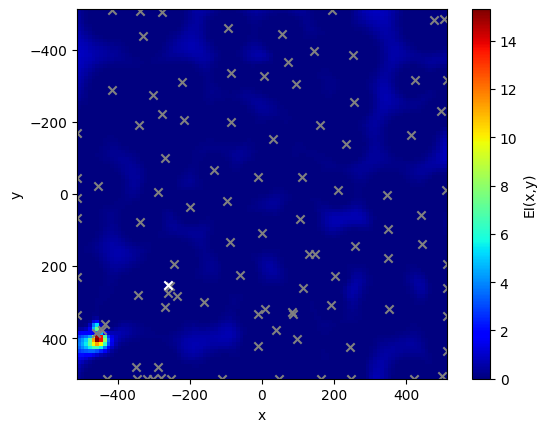

OptimizeResult(x=array([-460.33319609,  386.00823082]), fx=-890.5137471965352, nit=98, nfev=100, sample=array([[-256.        ,  256.        ],
       [ 256.        , -256.        ],
       [ 160.05735812, -190.649226  ],
       [-267.26296363,  312.02946057],
       [-243.64640333,  194.5455753 ],
       [-259.73250339,  274.56828649],
       [  38.35643547,  377.54870138],
       [-234.1429752 ,  281.57063092],
       [ 351.30167223,  319.30135281],
       [  85.66725141,  332.07407961],
       [   8.30568509,  317.46311746],
       [-344.32428055,  280.24474643],
       [  97.83335502,  401.41549121],
       [-278.96008502,  510.4911151 ],
       [-251.57731721,  512.        ],
       [-286.73225844,  479.77615722],
       [ -11.18632463,  420.27646097],
       [ 104.63257301,   68.16083019],
       [-161.51202957,  300.22905102],
       [ 114.18052175,  261.90941748],
       [  83.81842441,  327.28520383],
       [ -93.17894342, -459.79356987],
       [  -0.8284934 ,  108.20015416],

In [6]:
import blackboxopt.optimize as bbopt
from blackboxopt.gp import GaussianProcess
from blackboxopt.acquisition import expected_improvement
from blackboxopt.rbf import RbfModel
from sklearn.gaussian_process.kernels import RBF as GPkernelRBF

savefig=False

def callback_rbf(out: bbopt.OptimizeResult):

    print("Best value of ", out.fx, " at ", out.x)
    print("Last sample point at ", out.sample[out.nfev-1])

    if out.nfev % 10 == 0 or savefig:
        model = RbfModel()
        model.reserve(0, n)
        model.update(out.sample[0:out.nfev,:], out.fsample[0:out.nfev])

        S = np.zeros((ny,nx))
        for i in range(ny):
            S[i, :], _ = model(XY[i, :])

        plot_2d(out.sample[0:out.nfev,0], out.sample[0:out.nfev,1], S, bounds, "s(x,y)")
        if savefig:
            plt.savefig("surrogate_{:03d}.png".format(out.nfev))
        if out.nfev % 10 == 0:
            plt.show()
        else:
            plt.close()

def callback_gp(out: bbopt.OptimizeResult):

    print("Best value of ", out.fx, " at ", out.x)
    print("Last sample point at ", out.sample[out.nfev-1])

    if out.nfev % 10 == 0 or savefig:
        model = GaussianProcess(GPkernelRBF(), n_restarts_optimizer=20, normalize_y=True)
        model.update(out.sample[0:out.nfev,:], out.fsample[0:out.nfev])

        Mean = np.zeros((ny,nx))
        Std = np.zeros((ny,nx))
        EI = np.zeros((ny,nx))
        for i in range(ny):
            Mean[i, :], Std[i, :] = model(XY[i, :])
            EI[i, :] = expected_improvement(Mean[i, :], Std[i, :], out.fx)

        plot_2d(out.sample[0:out.nfev,0], out.sample[0:out.nfev,1], Mean, bounds, "s(x,y)")
        if savefig:
            plt.savefig("surrogate_{:03d}.png".format(out.nfev))
        if out.nfev % 10 == 0:
            plt.show()
        else:
            plt.close()

        plot_2d(out.sample[0:out.nfev,0], out.sample[0:out.nfev,1], EI, bounds, "EI(x,y)")
        if savefig:
            plt.savefig("EI_{:03d}.png".format(out.nfev))
        if out.nfev % 10 == 0:
            plt.show()
        else:
            plt.close()

np.random.seed(3)

callback = {"bayesian_optimization":callback_gp, "cptv":callback_rbf, "target_value_optimization":callback_rbf, "multistart_stochastic_response_surface":callback_rbf}
methodstr = "bayesian_optimization"

getattr(bbopt, methodstr)(lambda x: [objf[funcstr](xi) for xi in x], bounds=bounds, maxeval=100, callback=callback[methodstr])